In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
#import fitsio #(if we want to read faster)
import os
import flatmaps as fm
import pymaster as nmt
%matplotlib inline

Read the data file

In [2]:
HSCdatapath= '/global/cscratch1/sd/damonge/HSC/'
HSCFiles= ['HSC_WIDE_GAMA15H_forced.fits', 'HSC_WIDE_GAMA15H_random.fits']

In [3]:
data_tab = astropy.table.Table.read(os.path.join(HSCdatapath,HSCFiles[0]),hdu=1)

Read mask and its info

In [ ]:
mi, depth = fm.read_flat_map('maps/depthMap_i-band_JavisMethod.npz')

Select galaxies

In [96]:
def compute_cls(mag_cut=25.8, show_plots=True):
    #Select the galaxy sample
    data_gals = data_tab[(data_tab['iclassification_extendedness']==1) & (data_tab['icmodel_mag']<=mag_cut)]
    #Generate the map
    ipix = mi.pos2pix(data_gals['ra'],data_gals['dec'])
    mp = np.bincount(ipix,minlength=mi.get_size())
    #Select footprint creating a binary mask
    mask = depth>=mag_cut
    if show_plots:
        plt.figure()
        mi.view_map(mp)
    #We want the density contrast to compute the Cls
    dmap = np.zeros(len(mp))
    dmap[mp!=0] = mp[mp!=0]/np.mean(mp[mp!=0])-1.
    #Check how these maps look like
    if show_plots:
        plt.figure()
        mi.view_map(dmap*mp)
        plt.figure()
        mi.view_map(mask)
    #Compute Cls
    cl,lbpw,wsp=mi.compute_power_spectrum(dmap*mask,mask)
    ells = np.mean(lbpw,axis=0)
    return ells, cl

/global/u2/j/jsanch87/.local/cori/2.7-anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()


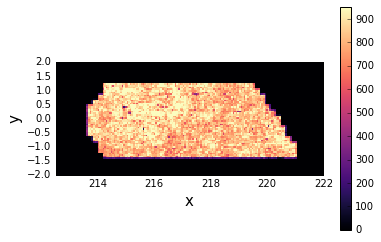

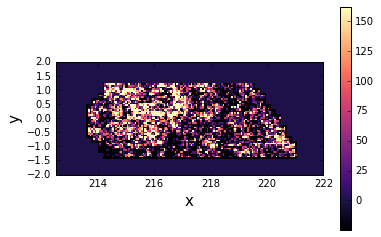

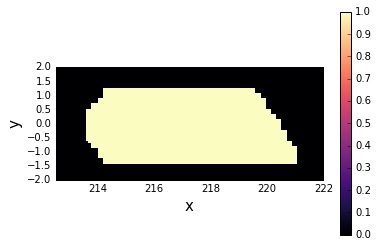

In [97]:
ells_25p8, cl_25p8 = compute_cls(mag_cut=25.8)

/global/u2/j/jsanch87/.local/cori/2.7-anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()


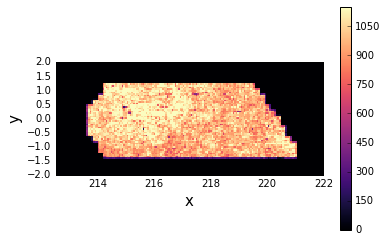

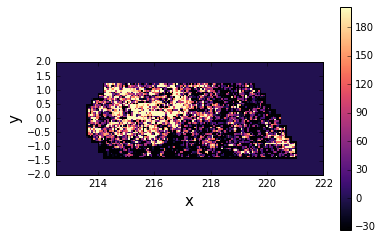

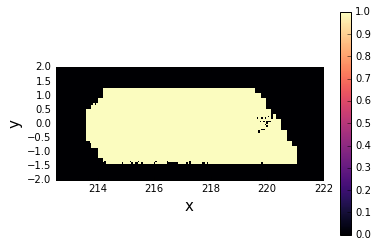

In [98]:
ells_26p2, cl_26p2 = compute_cls(mag_cut=26.2)

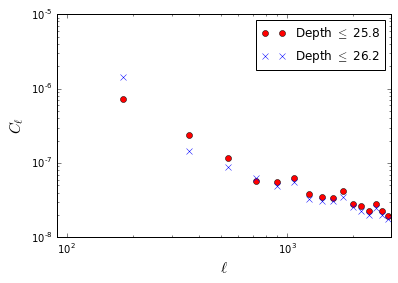

In [101]:
plt.plot(ells_25p8,cl_25p8,'ro',label=r'Depth $\leq$ 25.8')
plt.plot(ells_26p2,cl_26p2,'bx',label=r'Depth $\leq$ 26.2')
plt.xlim([lbpw[0,0],lbpw[1,-1]])
plt.loglog()
plt.xlabel('$\\ell$',fontsize=15)
plt.ylabel('$C_\\ell$',fontsize=15)
plt.legend()
# Still have to subtract shot noise!